In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot
import matplotlib.pyplot as plt

# A Simple Regression Problem

$$
\Large y = b + w x + \epsilon
$$

### Make preparations, some custom functions like plot

In [3]:
# Make preparations, some custom functions like plot
def figure1(x_train, y_train, x_val, y_val):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    ax[0].scatter(x_train, y_train)
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    ax[0].set_ylim([0, 3.1])
    ax[0].set_title('Generated Data - Train')

    ax[1].scatter(x_val, y_val, c='r')
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
    ax[1].set_ylim([0, 3.1])
    ax[1].set_title('Generated Data - Validation')
    fig.tight_layout()
    
    return fig, ax

## Data Generation

### Synthetic Data Generation

In [4]:
# Synthetic Data Generation
true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon

### Split data into train and validation sets

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Generated Data - Train'}, xlabel='x', ylabel='y'>,
        <Axes: title={'center': 'Generated Data - Validation'}, xlabel='x', ylabel='y'>],
       dtype=object))

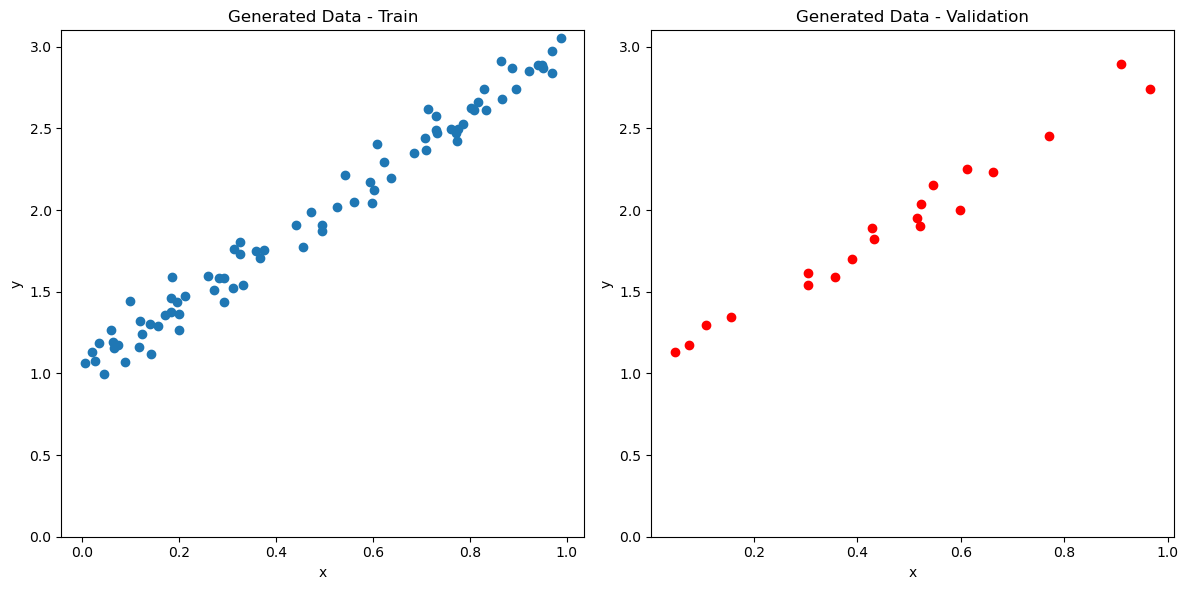

In [5]:
# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:int(N*.8)]
# Uses the remaining indices for validation
val_idx = idx[int(N*.8):]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

# using plot to draw train and validation data
figure1(x_train, y_train, x_val, y_val)

## Gradient Descent

### Step 0 - Random Initialization

In [6]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

[0.49671415] [-0.1382643]


### Step 1 - Compute Model’s Predictions

In [7]:
# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train

### Step 2 - Compute the Loss

In [8]:
# Step 2 - Computing the loss
# We are using ALL data points, so this is BATCH gradient
# descent. How wrong is our model? That's the error!
error = (yhat - y_train)

# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()

print(loss)

2.7421577700550976


### Step 3 - Compute the Gradients

In [9]:
# Step 3 - Computes gradients for both "b" and "w" parameters
b_grad = 2 * error.mean()
w_grad = 2 * (x_train * error).mean()
print(b_grad, w_grad)

-3.044811379650508 -1.8337537171510832


### Step 4 - Update the Parameters

In [11]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1
print(b, w)

# Step 4 - Updates parameters using gradients and 
# the learning rate
b = b - lr * b_grad
w = w - lr * w_grad

print(b, w)

[0.49671415] [-0.1382643]
[0.80119529] [0.04511107]


### Step 5: Rinse and Repeat

In [13]:
# Go back to Step 1 and run to observe how your parameters b and w change

## Loading Data, Devices and CUDA

In [12]:
x_train_tensor = torch.as_tensor(x_train)
x_train.dtype, x_train_tensor.dtype

(dtype('float64'), torch.float64)

In [10]:
dummy_array = np.array([1, 2, 3])
dummy_tensor = torch.as_tensor(dummy_array)
# Modifies the numpy array
dummy_array[1] = 0
# Tensor gets modified too...
dummy_tensor

tensor([1, 0, 3])